In [69]:
 #Import necessary libraries
import pandas as pd
import logging
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')


In [70]:
# Loading dataset
train = pd.read_csv("/kaggle/input/brist1d/train.csv", low_memory=False)
test = pd.read_csv("/kaggle/input/brist1d/test.csv", low_memory=False)
sample = pd.read_csv("/kaggle/input/brist1d/sample_submission.csv", low_memory=False)

## mapping patient ids

In [71]:
# Assuming train is a DataFrame
mapping_dict = {p: idx for idx, p in enumerate(train['p_num'].unique())}

# Map p_num and process time directly
train['p_num'] = train['p_num'].map(mapping_dict)
# Drop the 'id' column if it exists
if 'id' in train.columns:
    train.drop(columns=['id'], inplace=True)

In [72]:
import pandas as pd

# Assuming train is a DataFrame
mapping_dict = {p: idx for idx, p in enumerate(test['p_num'].unique())}

# Map p_num and process time directly
test['p_num'] = test['p_num'].map(mapping_dict)


if 'id' in test.columns:
    test.drop(columns=['id'], inplace=True)

## convert time

In [73]:
# Ensure 'time' is in datetime format
train['time'] = pd.to_datetime(train['time'], errors='coerce')  # Convert to datetime, invalid entries become NaT
test['time'] = pd.to_datetime(test['time'], errors='coerce')  # Apply to test as well

# Now you can safely use the .dt accessor
train["sin_hour"] = np.sin(np.pi * train['time'].dt.hour / 12)
train["cos_hour"] = np.cos(np.pi * train['time'].dt.hour / 12)

test["sin_hour"] = np.sin(np.pi * test['time'].dt.hour / 12)
test["cos_hour"] = np.cos(np.pi * test['time'].dt.hour / 12)


In [74]:
def drop_columns_with_high_nan(df, threshold=0.25):
    """
    Drops columns from the DataFrame if they have more than a specified
    percentage of missing values and returns the names of these columns.

    Parameters:
        df (pd.DataFrame): The input DataFrame.
        threshold (float): The percentage threshold for missing values (default is 0.25 for 25%).

    Returns:
        tuple: 
            - pd.DataFrame: The DataFrame with columns having more than `threshold`% missing values dropped.
            - list: Names of the columns that were dropped.
    """
    # Calculate the threshold count for missing values
    missing_threshold = len(df) * threshold

    # Identify columns with more missing values than the threshold
    high_nan_columns = df.columns[df.isnull().sum() > missing_threshold].tolist()

    # Drop the identified columns
    cleaned_df = df.drop(columns=high_nan_columns)

    return cleaned_df, high_nan_columns

In [75]:
# Apply the function
train_cleaned, dropped_columns = drop_columns_with_high_nan(train, threshold=0.25)


print("\nDropped Columns:")
print(dropped_columns)

print("Cleaned DataFrame:")
train_cleaned.head()


Dropped Columns:
['carbs-5:55', 'carbs-5:50', 'carbs-5:45', 'carbs-5:40', 'carbs-5:35', 'carbs-5:30', 'carbs-5:25', 'carbs-5:20', 'carbs-5:15', 'carbs-5:10', 'carbs-5:05', 'carbs-5:00', 'carbs-4:55', 'carbs-4:50', 'carbs-4:45', 'carbs-4:40', 'carbs-4:35', 'carbs-4:30', 'carbs-4:25', 'carbs-4:20', 'carbs-4:15', 'carbs-4:10', 'carbs-4:05', 'carbs-4:00', 'carbs-3:55', 'carbs-3:50', 'carbs-3:45', 'carbs-3:40', 'carbs-3:35', 'carbs-3:30', 'carbs-3:25', 'carbs-3:20', 'carbs-3:15', 'carbs-3:10', 'carbs-3:05', 'carbs-3:00', 'carbs-2:55', 'carbs-2:50', 'carbs-2:45', 'carbs-2:40', 'carbs-2:35', 'carbs-2:30', 'carbs-2:25', 'carbs-2:20', 'carbs-2:15', 'carbs-2:10', 'carbs-2:05', 'carbs-2:00', 'carbs-1:55', 'carbs-1:50', 'carbs-1:45', 'carbs-1:40', 'carbs-1:35', 'carbs-1:30', 'carbs-1:25', 'carbs-1:20', 'carbs-1:15', 'carbs-1:10', 'carbs-1:05', 'carbs-1:00', 'carbs-0:55', 'carbs-0:50', 'carbs-0:45', 'carbs-0:40', 'carbs-0:35', 'carbs-0:30', 'carbs-0:25', 'carbs-0:20', 'carbs-0:15', 'carbs-0:10', '

,p_num,time,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,bg-5:20,...,cals-0:30,cals-0:25,cals-0:20,cals-0:15,cals-0:10,cals-0:05,cals-0:00,bg+1:00,sin_hour,cos_hour
0,0,2024-11-22 06:10:00,NaN,NaN,9.6,NaN,NaN,9.7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.4,1.000000,6.123234e-17
1,0,2024-11-22 06:25:00,NaN,NaN,9.7,NaN,NaN,9.2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.8,1.000000,6.123234e-17
2,0,2024-11-22 06:40:00,NaN,NaN,9.2,NaN,NaN,8.7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.5,1.000000,6.123234e-17
3,0,2024-11-22 06:55:00,NaN,NaN,8.7,NaN,NaN,8.4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.8,1.000000,6.123234e-17
4,0,2024-11-22 07:10:00,NaN,NaN,8.4,NaN,NaN,8.1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.7,0.965926,-2.588190e-01


In [76]:
def apply_column_removal_to_test(train_df, test_df, threshold=0.25):
    """
    Applies column removal based on NaN threshold from train data to test data.
    
    Parameters:
        train_df (pd.DataFrame): The training DataFrame.
        test_df (pd.DataFrame): The test DataFrame.
        threshold (float): The percentage threshold for missing values (default is 0.25 for 25%).

    Returns:
        tuple:
            - pd.DataFrame: Cleaned test DataFrame with columns dropped.
            - list: Names of the columns dropped from the test data.
    """
    # Drop columns in train data and get the names of dropped columns
    _, high_nan_columns_train = drop_columns_with_high_nan(train_df, threshold)

    # Remove the same columns from test data
    cleaned_test_df = test_df.drop(columns=high_nan_columns_train, errors='ignore')

    return cleaned_test_df, high_nan_columns_train

In [77]:
# Apply the function
test_cleaned, dropped_columns = apply_column_removal_to_test(train, test, threshold=0.25)



print("\nDropped Columns from Test Data:")
print(dropped_columns)

print("Cleaned Test DataFrame:")
test_cleaned.head()


Dropped Columns from Test Data:
['carbs-5:55', 'carbs-5:50', 'carbs-5:45', 'carbs-5:40', 'carbs-5:35', 'carbs-5:30', 'carbs-5:25', 'carbs-5:20', 'carbs-5:15', 'carbs-5:10', 'carbs-5:05', 'carbs-5:00', 'carbs-4:55', 'carbs-4:50', 'carbs-4:45', 'carbs-4:40', 'carbs-4:35', 'carbs-4:30', 'carbs-4:25', 'carbs-4:20', 'carbs-4:15', 'carbs-4:10', 'carbs-4:05', 'carbs-4:00', 'carbs-3:55', 'carbs-3:50', 'carbs-3:45', 'carbs-3:40', 'carbs-3:35', 'carbs-3:30', 'carbs-3:25', 'carbs-3:20', 'carbs-3:15', 'carbs-3:10', 'carbs-3:05', 'carbs-3:00', 'carbs-2:55', 'carbs-2:50', 'carbs-2:45', 'carbs-2:40', 'carbs-2:35', 'carbs-2:30', 'carbs-2:25', 'carbs-2:20', 'carbs-2:15', 'carbs-2:10', 'carbs-2:05', 'carbs-2:00', 'carbs-1:55', 'carbs-1:50', 'carbs-1:45', 'carbs-1:40', 'carbs-1:35', 'carbs-1:30', 'carbs-1:25', 'carbs-1:20', 'carbs-1:15', 'carbs-1:10', 'carbs-1:05', 'carbs-1:00', 'carbs-0:55', 'carbs-0:50', 'carbs-0:45', 'carbs-0:40', 'carbs-0:35', 'carbs-0:30', 'carbs-0:25', 'carbs-0:20', 'carbs-0:15', 

,p_num,time,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,bg-5:20,...,cals-0:35,cals-0:30,cals-0:25,cals-0:20,cals-0:15,cals-0:10,cals-0:05,cals-0:00,sin_hour,cos_hour
0,0,2024-11-22 06:45:00,NaN,9.2,NaN,NaN,10.2,NaN,NaN,10.3,...,4.90,4.80,4.80,4.80,4.80,4.80,4.90,6.06,1.000000,6.123234e-17
1,0,2024-11-22 11:25:00,NaN,NaN,9.9,NaN,NaN,9.4,NaN,NaN,...,9.70,13.92,16.22,16.69,23.12,30.51,24.57,32.43,0.258819,-9.659258e-01
2,0,2024-11-22 14:45:00,NaN,5.5,NaN,NaN,5.5,NaN,NaN,5.2,...,9.98,25.24,12.27,6.83,6.53,7.97,19.76,10.16,-0.500000,-8.660254e-01
3,0,2024-11-22 04:30:00,NaN,3.4,NaN,NaN,3.9,NaN,NaN,4.7,...,4.80,5.00,4.90,4.90,4.80,4.80,4.90,4.80,0.866025,5.000000e-01
4,0,2024-11-22 04:20:00,NaN,NaN,8.3,NaN,NaN,10.0,NaN,NaN,...,4.80,4.80,4.90,4.80,4.80,4.80,4.80,4.80,0.866025,5.000000e-01


In [78]:
print("Updated df_train:",train_cleaned.shape)
print("Updated df_test:",test_cleaned.shape)

Updated df_train: (177024, 221)
Updated df_test: (3644, 220)


In [79]:
train_cleaned = train_cleaned.apply(lambda x: x.fillna(method='ffill').fillna(method='bfill') if x.name.startswith('bg-') else x)
train_cleaned = train_cleaned.apply(lambda x: x.fillna(0) if x.name.startswith('cals') or x.name.startswith('insulin') else x)


test_cleaned = test_cleaned.apply(lambda x: x.fillna(method='ffill').fillna(method='bfill') if x.name.startswith('bg-') else x)
test_cleaned = test_cleaned.apply(lambda x: x.fillna(0) if x.name.startswith('cals') or x.name.startswith('insulin') else x)


In [80]:

print(train_cleaned.isnull().sum().any())

print(test_cleaned.isnull().sum().any())

False
False


## timestep 

In [83]:
def get_more_data_by_patient(df, timestep, mode='train', ts=None, feats=['bg', 'insulin', 'cals']):
    """
    This function generates training or test data for each patient based on the provided mode (train or test).
    :param df: DataFrame containing the raw patient data.
    :param timestep: The number of time steps to consider for features.
    :param mode: Can be 'train' or 'test', defines how the data is processed.
    :param ts: List of time stamps for the data.
    :param feats: List of feature categories to be used in the model.
    :return: A DataFrame containing the processed data.
    """
    # Initialize the list to store the final data (training or test data)
    full_data = []

    if mode == 'train':
        # Loop through time windows for the training data
        for start in range(0, len(ts) - timestep - 12):  # 12 is for the future target time step
            end = start + timestep
            target = end + 12  # 12 steps ahead as the target
            
            # Generate the columns for the feature set and the target value
            hours_data = df[['p_num'] + 
                            [f + ts[i] for i in range(start, end) for f in feats] + 
                            ['bg' + ts[target]]]
            
            # Rename the columns for clarity
            hours_data.columns = ['p_num'] + \
                                 [f + str(i - start) for i in range(start, end) for f in feats] + \
                                 ['bg+1:00']  # Assuming 'bg+1:00' is the target
            
            # Remove rows with missing target values (NaN values)
            hours_data = hours_data[~hours_data['bg+1:00'].isna()]
            
            # Append the processed data for this time window to the list
            full_data.append(hours_data)

    elif mode == 'test':
        # Process the test data for making predictions
        # Get the latest time window based on the timestep value
        hours_data = df[['p_num'] + 
                        [f + ts[i] for i in range(len(ts) - timestep, len(ts)) for f in feats]]
        
        # Rename the columns appropriately for the test data
        hours_data.columns = ['p_num'] + \
                             [f + str(i - len(ts) + timestep) for i in range(len(ts) - timestep, len(ts)) for f in feats]
        
        # Append the processed test data to the list
        full_data.append(hours_data)

    # Concatenate all collected data into a single DataFrame
    full_data = pd.concat(full_data)
    
    # Only drop duplicates in training mode
    if mode == 'train':
        full_data = full_data.drop_duplicates()

    return full_data


In [84]:
train_cleaned_processed = get_more_data_by_patient(train_cleaned, timestep=12, mode='train', ts=ts)
test_cleaned_processed = get_more_data_by_patient(test_cleaned, timestep=12, mode='test', ts=ts)

print("Updated df_train:", train_cleaned_processed.shape)
print("Updated df_test:", test_cleaned_processed.shape)


Updated df_train: (1068191, 38)
Updated df_test: (3644, 37)


In [85]:
train_cleaned_processed

,p_num,bg0,insulin0,cals0,bg1,insulin1,cals1,bg2,insulin2,cals2,...,bg9,insulin9,cals9,bg10,insulin10,cals10,bg11,insulin11,cals11,bg+1:00
0,0,8.2,0.0083,0.00,13.8,0.0083,0.00,9.6,0.0083,0.00,...,8.2,0.0083,0.00,15.5,0.0083,0.00,8.7,0.0083,0.00,10.2
1,0,8.2,0.0083,0.00,13.8,0.0083,0.00,9.7,0.0083,0.00,...,8.2,0.0083,0.00,15.5,0.0083,0.00,8.4,0.0083,0.00,10.2
2,0,8.2,0.0083,0.00,13.8,0.0083,0.00,9.2,0.0083,0.00,...,8.2,0.0083,0.00,15.5,0.0083,0.00,8.1,0.0083,0.00,10.2
3,0,8.2,0.0083,0.00,13.8,0.0083,0.00,8.7,0.0083,0.00,...,8.2,0.0083,0.00,15.5,0.0083,0.00,8.3,0.0083,0.00,10.2
4,0,8.2,0.0083,0.00,13.8,0.0083,0.00,8.4,0.0083,0.00,...,8.2,0.0083,0.00,15.5,0.0083,0.00,9.6,0.0083,0.00,10.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176111,8,6.8,0.0000,33.00,6.9,0.0000,28.80,7.0,0.0000,20.83,...,7.8,0.0000,13.53,7.7,0.0000,15.02,7.1,0.0000,11.64,4.7
176112,8,6.8,0.0000,28.80,6.9,0.0000,20.83,7.0,0.0000,24.75,...,7.7,0.0000,15.02,7.1,0.0000,11.64,6.9,0.0000,20.70,4.7
176113,8,6.8,0.0000,20.83,6.9,0.0000,24.75,7.0,0.0000,33.53,...,7.1,0.0000,11.64,6.9,0.0000,20.70,6.6,0.0000,11.23,4.8
176114,8,6.8,0.0000,24.75,6.9,0.0000,33.53,7.0,0.0000,31.10,...,6.9,0.0000,20.70,6.6,0.0000,11.23,6.3,0.0000,14.48,5.0


In [86]:
# Check the shape of train and test data after Z-score calculation in test data
print(f"Train Shape after Z-score calculation (train): {train_cleaned_processed.shape}")
print(f"Test Shape after Z-score calculation (test): {test_cleaned_processed.shape}")

Train Shape after Z-score calculation (train): (1068191, 38)
Test Shape after Z-score calculation (test): (3644, 37)


## cross feature

In [87]:
# List of features to create cross-features for
cross = ['bg', 'insulin', 'cals']
timestep = 12

# Function to create cross features
def create_cross_features(df, cross, timestep):
    for i in range(len(cross)):
        for j in range(i + 1, len(cross)):
            for k in [1]:  # Assuming you want to create cross-features for timestep-1
                # Addition
                df[cross[i] + f"{timestep-k}+" + cross[j] + f"{timestep-k}"] = df[cross[i] + f"{timestep-k}"] + df[cross[j] + f"{timestep-k}"]

                # Subtraction
                df[cross[i] + f"{timestep-k}-" + cross[j] + f"{timestep-k}"] = df[cross[i] + f"{timestep-k}"] - df[cross[j] + f"{timestep-k}"]

                # Multiplication
                df[cross[i] + f"{timestep-k}*" + cross[j] + f"{timestep-k}"] = df[cross[i] + f"{timestep-k}"] * df[cross[j] + f"{timestep-k}"]

                # Division (with small epsilon to avoid divide by zero errors)
                df[cross[i] + f"{timestep-k}/" + cross[j] + f"{timestep-k}"] = df[cross[i] + f"{timestep-k}"] / (df[cross[j] + f"{timestep-k}"] + 1e-15)

    return df


In [88]:
# Apply the function to both train and test data
train_df = create_cross_features(train_cleaned_processed, cross, timestep)
test_df = create_cross_features(test_cleaned_processed, cross, timestep)

print("Cross features created for both train and test data.")

Cross features created for both train and test data.


In [89]:
# Check shapes after creating cross features
print(f"Train Shape after Cross Features (train): {train_df.shape}")
print(f"Test Shape after Cross Features (test): {test_df.shape}")

Train Shape after Cross Features (train): (1068191, 50)
Test Shape after Cross Features (test): (3644, 49)


In [90]:
# Identify missing columns in train compared to test
missing_in_train = set(test_df.columns) - set(train_df.columns)
print(f"Missing columns in train: {missing_in_train}")

# Identify missing columns in test compared to train
missing_in_test = set(train_df.columns) - set(test_df.columns)
print(f"Missing columns in test: {missing_in_test}")


Missing columns in train: set()
Missing columns in test: {'bg+1:00'}


In [91]:
# Identify missing columns in train compared to test
missing_in_train = set(test_df.columns) - set(train_df.columns)
print(f"Missing columns in train: {missing_in_train}")

# Identify missing columns in test compared to train
missing_in_test = set(train_df.columns) - set(test_df.columns)
print(f"Missing columns in test: {missing_in_test}")

Missing columns in train: set()
Missing columns in test: {'bg+1:00'}


In [92]:
# Check for missing values in train_filtered
missing_train = train_df.isnull().sum()
print("Missing values in train_filtered:")
print(missing_train[missing_train > 0])

# Check for missing values in test_df
missing_test = test_df.isnull().sum()
print("Missing values in test_df:")
print(missing_test[missing_test > 0])

# Summary
if missing_train.sum() == 0 and missing_test.sum() == 0:
    print("Both datasets are complete: No missing values.")
else:
    print("Missing values found. Please address them.")


Missing values in train_filtered:
Series([], dtype: int64)
Missing values in test_df:
Series([], dtype: int64)
Both datasets are complete: No missing values.


In [26]:
X = train_df.drop(['bg+1:00'], axis=1)
y = train_df['bg+1:00']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2 , random_state = 42)

In [27]:

print(f"Training data shape: {X_train.shape}")
print(f"Validation data shape: {X_val.shape}")

Training data shape: (854552, 49)
Validation data shape: (213639, 49)


## Stacking mode

Training Stacking Model on all data (excluding 'p_num')...
Learning rate set to 0.050761
0:	learn: 3.4461265	total: 137ms	remaining: 6m 49s
1000:	learn: 2.0616920	total: 7.15s	remaining: 14.3s
2000:	learn: 1.9420715	total: 14s	remaining: 6.97s
2999:	learn: 1.8606916	total: 20.9s	remaining: 0us
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 11825
[LightGBM] [Info] Number of data points in the train set: 854552, number of used features: 48
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...


1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.


[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 48 dense feature groups (39.12 MB) transferred to GPU in 0.035205 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 8.792012
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 9
[LightGBM] [Debug] Tra

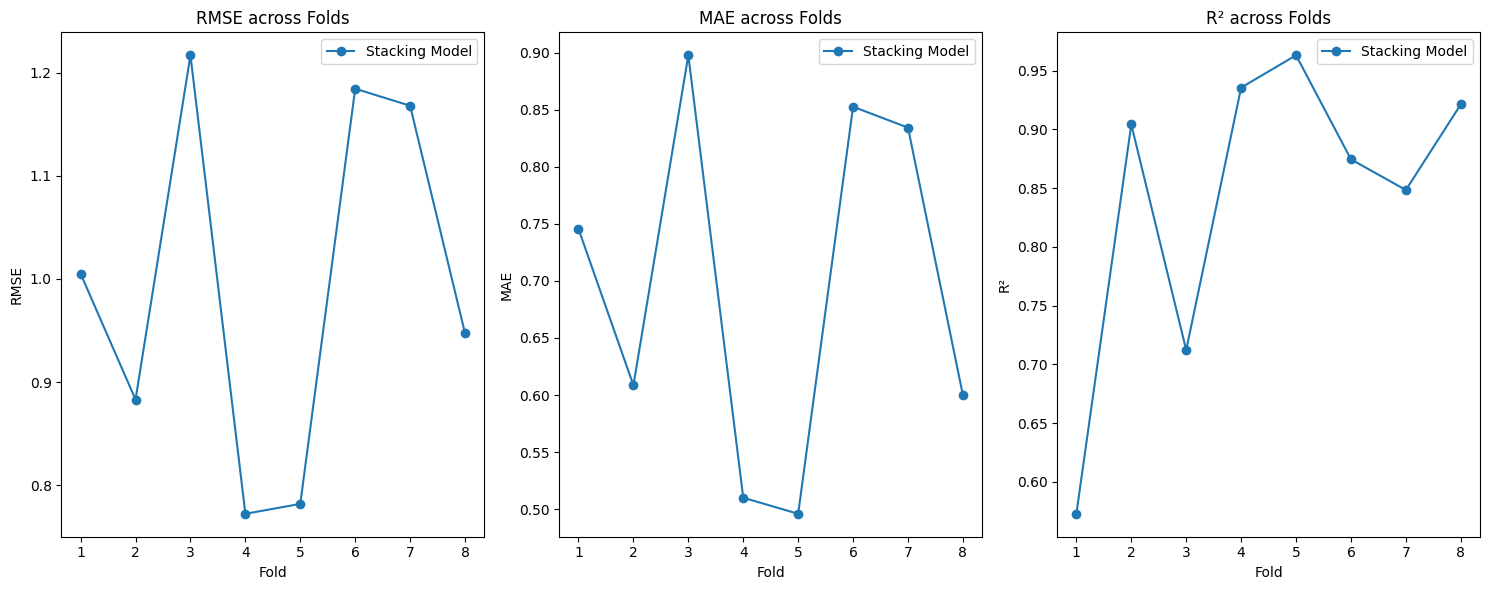

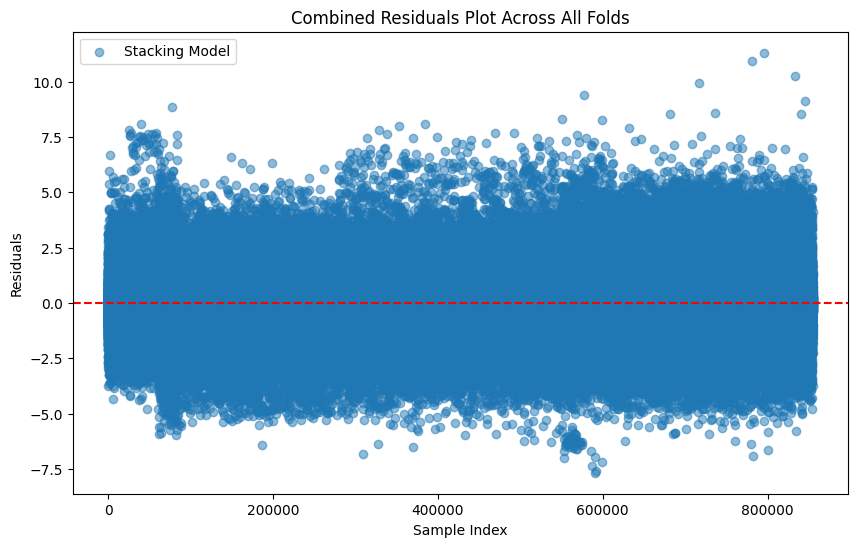

Trained Stacking model saved as 'stacking_model_no_pnum.pkl'


In [28]:
import numpy as np
import pickle
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.ensemble import StackingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import matplotlib.pyplot as plt

# Define base estimators with GPU configurations
estimators = [
    ('xgb', XGBRegressor(random_state=42, n_estimators=3000, tree_method='gpu_hist', device='cuda')),
    ('catboost', CatBoostRegressor(random_seed=42, iterations=3000, verbose=1000, task_type='GPU')),
    ('lgbm', LGBMRegressor(random_state=42, n_estimators=3000, verbose=1000, device='gpu'))
]

# Meta-model (Ridge)
meta_model = Ridge(alpha=0.1)

# Create StackingRegressor
stacking_model = StackingRegressor(estimators=estimators, final_estimator=meta_model)

# Get unique groups
unique_groups = X_train['p_num'].unique()

# Shuffle groups for randomness
np.random.shuffle(unique_groups)

# Define k-folds based on the number of groups
k = 8
fold_size = len(unique_groups) // k
folds = [unique_groups[i * fold_size:(i + 1) * fold_size] for i in range(k)]

# Ensure the last fold contains all remaining groups
folds[-1] = np.concatenate((folds[-1], unique_groups[k * fold_size:]))

# Initialize metrics
rmse_scores = []
mae_scores = []
r2_scores = []
all_residuals = []

# Train the model once on all data (excluding 'p_num')
print("Training Stacking Model on all data (excluding 'p_num')...")
X_train_combined = X_train.drop(columns=['p_num'])  # Remove 'p_num' before training
stacking_model.fit(X_train_combined, y_train)

# Validate on each fold
for fold_idx, test_groups in enumerate(folds, 1):
    print(f"Validating on Fold {fold_idx}...")
    
    # Split validation data based on group
    val_mask = X_train['p_num'].isin(test_groups)
    X_val = X_train[val_mask].drop(columns=['p_num'])  # Drop 'p_num' for validation too
    y_val = y_train[val_mask]
    
    # Predict and evaluate
    y_pred = stacking_model.predict(X_val)
    
    # Metrics
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    mae = mean_absolute_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    residuals = y_val - y_pred
    
    # Store metrics
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    all_residuals.extend(residuals)
    
    print(f"Fold {fold_idx} - RMSE: {rmse:.4f}, MAE: {mae:.4f}, R²: {r2:.4f}")

# Plot metrics across folds
plt.figure(figsize=(15, 6))

# RMSE Plot
plt.subplot(1, 3, 1)
plt.plot(range(1, k + 1), rmse_scores, marker='o', label='Stacking Model')
plt.title("RMSE across Folds")
plt.xlabel("Fold")
plt.ylabel("RMSE")
plt.legend()

# MAE Plot
plt.subplot(1, 3, 2)
plt.plot(range(1, k + 1), mae_scores, marker='o', label='Stacking Model')
plt.title("MAE across Folds")
plt.xlabel("Fold")
plt.ylabel("MAE")
plt.legend()

# R² Plot
plt.subplot(1, 3, 3)
plt.plot(range(1, k + 1), r2_scores, marker='o', label='Stacking Model')
plt.title("R² across Folds")
plt.xlabel("Fold")
plt.ylabel("R²")
plt.legend()

plt.tight_layout()
plt.show()

# Combined residuals plot
plt.figure(figsize=(10, 6))
plt.scatter(range(len(all_residuals)), all_residuals, alpha=0.5, label="Stacking Model")
plt.axhline(0, color='r', linestyle='--')
plt.title("Combined Residuals Plot Across All Folds")
plt.xlabel("Sample Index")
plt.ylabel("Residuals")
plt.legend()
plt.show()

# Save the trained model
with open('stacking_model_no_pnum.pkl', 'wb') as f:
    pickle.dump(stacking_model, f)

print("Trained Stacking model saved as 'stacking_model_no_pnum.pkl'")


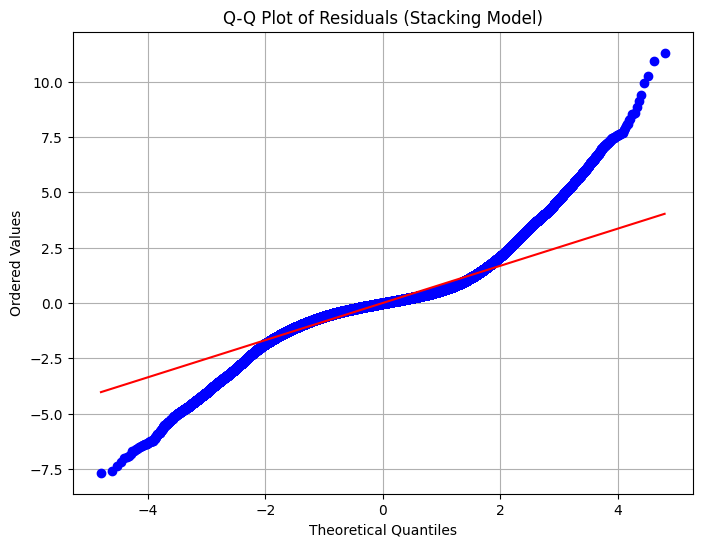

In [30]:
# Assuming all_residuals contains the residuals of the stacking model validation
# all_residuals is available from the previous training and validation steps
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Generate Q-Q plot for stacking model residuals
plt.figure(figsize=(8, 6))
stats.probplot(all_residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals (Stacking Model)")
plt.ylabel("Ordered Values")
plt.xlabel("Theoretical Quantiles")
plt.grid(True)
plt.show()


In [31]:
import pickle

# Load the trained stacking model
with open('stacking_model_no_pnum.pkl', 'rb') as f:
    trained_stacking_model = pickle.load(f)



# Make predictions
y_pred = trained_stacking_model.predict(X_val)

# Display predictions
print("Predictions:")
print(y_pred)


Predictions:
[ 6.48675238  9.66092976  6.13229418 ...  6.18943614  8.56870252
 11.97812291]


RMSE: 0.9472936379913756
MAE: 0.6000129504266388
R²: 0.9212888202588427


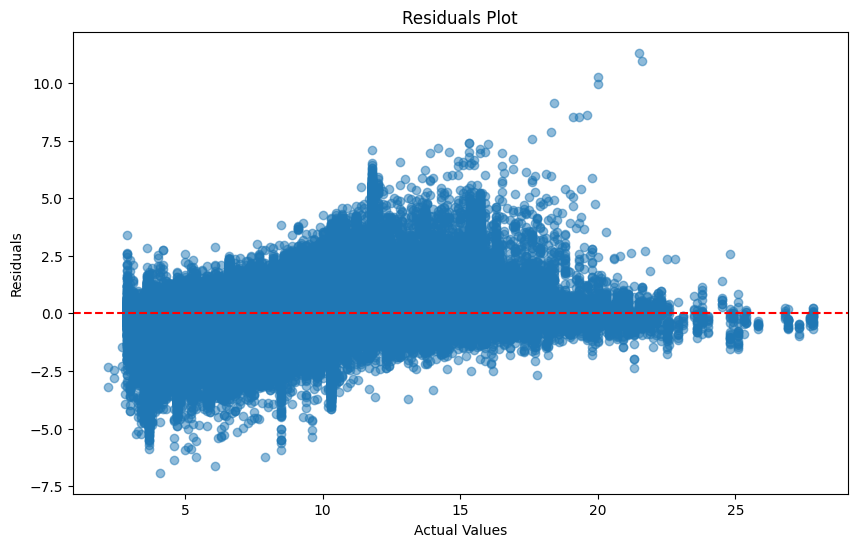

In [32]:

rmse = np.sqrt(mean_squared_error(y_val, y_pred))
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
residuals = y_val - y_pred

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R²: {r2}")

plt.figure(figsize=(10, 6))
plt.scatter(y_val, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')  #
plt.title("Residuals Plot")
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.show()

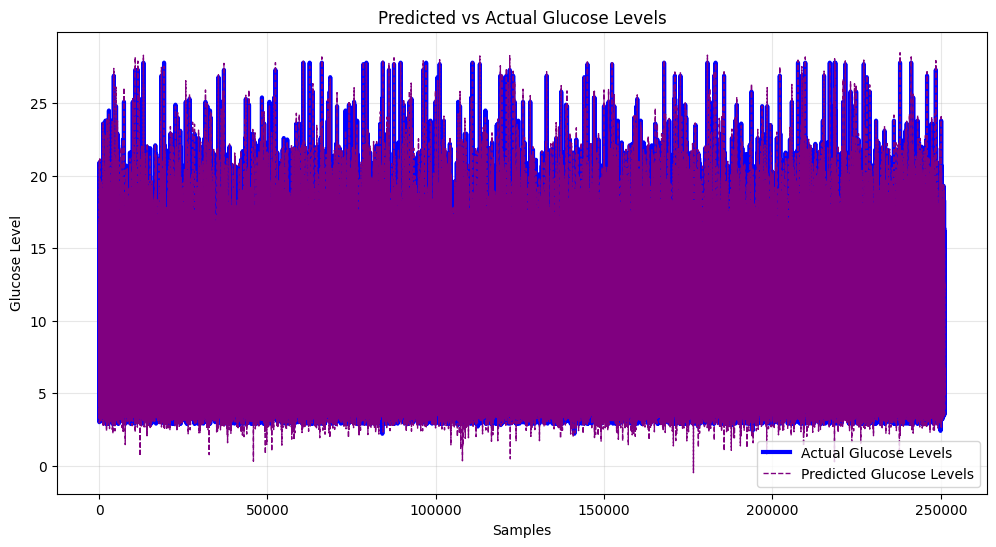

In [96]:
# Visualize Predictions with Adjusted Colors
plt.figure(figsize=(12, 6))
plt.plot(y_val.values, label='Actual Glucose Levels', color='blue', linestyle='-', linewidth=3)
plt.plot(y_pred, label='Predicted Glucose Levels', color='purple', linestyle='--', linewidth=1)
plt.xlabel('Samples')
plt.ylabel('Glucose Level')
plt.title('Predicted vs Actual Glucose Levels')
plt.legend()
plt.grid(alpha=0.3)  # Optional: Add a grid for better readability
plt.show()

## interference


In [93]:
test_df = test_df.drop('p_num', axis = 1)
print(len(test_df))

# Make predictions
y_pred_test = trained_stacking_model.predict(test_df)
print(len(y_pred_test))

3644
3644


In [94]:
import pandas as pd

# Check the length of y_pred_test to make sure it matches sample['id']
print(f"Length of y_pred_test: {len(y_pred_test)}")
print(f"Length of test_id['id']: {len(sample['id'])}")

# Ensure the y_pred_test matches the length of sample['id']
if len(y_pred_test) == len(sample['id']):
    # Create the submission DataFrame
    submission_df = pd.DataFrame({
        'id': sample['id'],  # Using the 'id' from the sample DataFrame
        'bg+1:00': y_pred_test  # Predictions from the model
    })

    # Display the first few rows of the submission DataFrame to verify
    print(submission_df.head())

    # Save the submission to a CSV file
    submission_df.to_csv('submission.csv', index=False)
    print(f'Submission file saved successfully.')
else:
    print(f"Error: The length of y_pred_test does not match the length of sample['id']")

Length of y_pred_test: 3644
Length of test_id['id']: 3644
         id    bg+1:00
0  p01_8459   7.635895
1  p01_8460   6.624320
2  p01_8461   8.030121
3  p01_8462   8.670416
4  p01_8463  11.153666
Submission file saved successfully.
